<a href="https://colab.research.google.com/github/stonewallmhk/QuantMindi/blob/main/ModernPortfolioTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementiong Modern Portfolio Theory**
<br>

*   Modern Portfolio Theory (MPT) is a mathematical framework using mean-variance for return-risk for grouping a
portfolio of assets (stocks) such that the expected return is maximized for a given level of risk.
*   This notebook intends to find the ***EFFICIENT FRONTIER***. It is the optimal portfolio that offers highest expected return for a defined level of risk.
*   This notebook tries to construct a portfolio of 4 assets from top 10 US TECH stocks by market cap
<br><br>
Stocks selected: ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'TSM', 'TCEHY', 'AVGO']



In [1]:
# Install yahoo finance
!pip install yfinance

In [2]:
# Import libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

Declare few variable which will be used later in the code

In [5]:
# on average there are 252 trading days in a year
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 10000

# stocks to handle
stock_list =  ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'TSLA', 'META', 'TSM', 'TCEHY', 'AVGO']

# Historical data
start_date = '2013-06-01'
end_date = '2023-06-01'

In [6]:
# Generate a list of 4 stocks using different combinations from the total of 10
from itertools import combinations

r = 4 # This is the number of stocks per portfolio

stocks = list(combinations(stock_list, r))
print(len(stocks))
print(stocks)

210
[('AAPL', 'MSFT', 'GOOG', 'AMZN'), ('AAPL', 'MSFT', 'GOOG', 'NVDA'), ('AAPL', 'MSFT', 'GOOG', 'TSLA'), ('AAPL', 'MSFT', 'GOOG', 'META'), ('AAPL', 'MSFT', 'GOOG', 'TSM'), ('AAPL', 'MSFT', 'GOOG', 'TCEHY'), ('AAPL', 'MSFT', 'GOOG', 'AVGO'), ('AAPL', 'MSFT', 'AMZN', 'NVDA'), ('AAPL', 'MSFT', 'AMZN', 'TSLA'), ('AAPL', 'MSFT', 'AMZN', 'META'), ('AAPL', 'MSFT', 'AMZN', 'TSM'), ('AAPL', 'MSFT', 'AMZN', 'TCEHY'), ('AAPL', 'MSFT', 'AMZN', 'AVGO'), ('AAPL', 'MSFT', 'NVDA', 'TSLA'), ('AAPL', 'MSFT', 'NVDA', 'META'), ('AAPL', 'MSFT', 'NVDA', 'TSM'), ('AAPL', 'MSFT', 'NVDA', 'TCEHY'), ('AAPL', 'MSFT', 'NVDA', 'AVGO'), ('AAPL', 'MSFT', 'TSLA', 'META'), ('AAPL', 'MSFT', 'TSLA', 'TSM'), ('AAPL', 'MSFT', 'TSLA', 'TCEHY'), ('AAPL', 'MSFT', 'TSLA', 'AVGO'), ('AAPL', 'MSFT', 'META', 'TSM'), ('AAPL', 'MSFT', 'META', 'TCEHY'), ('AAPL', 'MSFT', 'META', 'AVGO'), ('AAPL', 'MSFT', 'TSM', 'TCEHY'), ('AAPL', 'MSFT', 'TSM', 'AVGO'), ('AAPL', 'MSFT', 'TCEHY', 'AVGO'), ('AAPL', 'GOOG', 'AMZN', 'NVDA'), ('AAPL', 

In [12]:
arr = [1,2,3,4,5,6,7,8,9,10]
len(list(combinations(arr,r)))

210

Download data

In [13]:
def download_data():
  #name of the stock (key) - stock values (2010-2017)
  stock_data = {}

  for stock in stock_list:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']

  return pd.DataFrame(stock_data)

dataset = download_data()
dataset.head()

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,TSM,TCEHY,AVGO
Date,,,,,,,,,,
2013-06-03 00:00:00-04:00,13.975493,29.657705,21.609751,13.3440,3.373372,6.172667,23.850000,13.794108,7.250212,28.185244
2013-06-04 00:00:00-04:00,13.931772,29.157715,21.397299,13.2850,3.378040,6.322667,23.520000,13.963680,7.185724,28.563068
2013-06-05 00:00:00-04:00,13.801540,28.982710,21.412243,13.3585,3.305671,6.358000,22.900000,13.757248,7.069646,27.958555
2013-06-06 00:00:00-04:00,13.595346,29.132717,21.535280,13.3915,3.326681,6.490000,22.969999,13.713013,7.167299,27.769640
2013-06-07 00:00:00-04:00,13.699219,29.724373,21.911121,13.8435,3.373372,6.802667,23.290001,13.779367,7.115709,28.177685


import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6690760259106227040, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6690760259106227040, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6690760259106227040, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6690760259106227040, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6690760259106227040, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6690760259106227040, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6690760259106227040, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6690760259106227040, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6690760259106227040, *[[['AAPL', 'MSFT'], ['MSFT', 'GOOG'], ['GOOG', 'AMZN'], ['AMZN', 'NVDA']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6690760259106227040, *['TSLA', 'AAPL', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6690760259106227040, *['TSLA', 'MSFT', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6690760259106227040, *['TSLA', 'GOOG', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6690760259106227040 = autoviz.get_registered_df('df_6690760259106227040')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6690760259106227040, *['TSLA', 'AMZN', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_825010649434420545 = autoviz.get_registered_df('df_825010649434420545')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_825010649434420545, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_456276727894246157 = autoviz.get_registered_df('df_456276727894246157')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_456276727894246157, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8690382926489563340 = autoviz.get_registered_df('df_8690382926489563340')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8690382926489563340, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7276765528602512176 = autoviz.get_registered_df('df_7276765528602512176')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7276765528602512176, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_781678033368450521 = autoviz.get_registered_df('df_781678033368450521')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_781678033368450521, *['AAPL'], **{})
chart

import numpy as np
from google.colab import autoviz
df_706694725791221562 = autoviz.get_registered_df('df_706694725791221562')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_706694725791221562, *['MSFT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6501733102736768833 = autoviz.get_registered_df('df_6501733102736768833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6501733102736768833, *['GOOG'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6975349851453335515 = autoviz.get_registered_df('df_6975349851453335515')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6975349851453335515, *['AMZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1504753263762307008 = autoviz.get_registered_df('df_1504753263762307008')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1504753263762307008, *[[['AAPL', 'MSFT'], ['MSFT', 'GOOG'], ['GOOG', 'AMZN'], ['AMZN', 'NVDA']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_5590593272728675639 = autoviz.get_registered_df('df_5590593272728675639')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5590593272728675639, *['Date', 'AAPL', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2683396764881541903 = autoviz.get_registered_df('df_2683396764881541903')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2683396764881541903, *['Date', 'MSFT', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6543441997492550115 = autoviz.get_registered_df('df_6543441997492550115')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6543441997492550115, *['Date', 'GOOG', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4409078385145532505 = autoviz.get_registered_df('df_4409078385145532505')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  def _plot_series(series, series_name):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name)

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for series_name, series in df.groupby(series_colname):
      _plot_series(series, series_name)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4409078385145532505, *['Date', 'AMZN', None], **{})
chart

In [14]:
def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

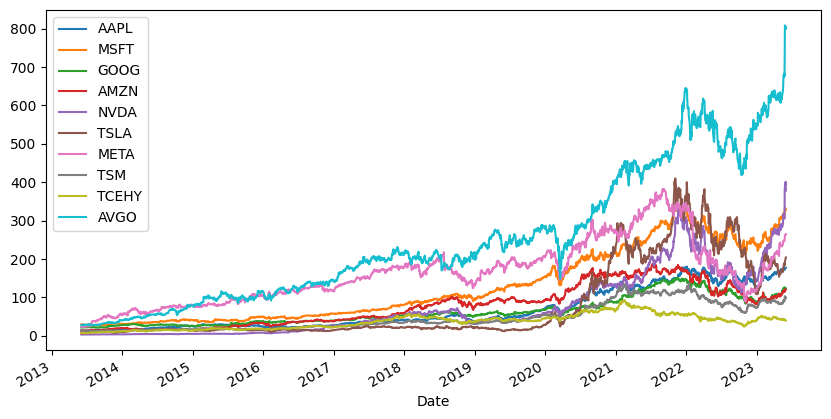

In [15]:
show_data(dataset)

As per the above plot, Broadcom (AVGO) is more relatively more costly than others.

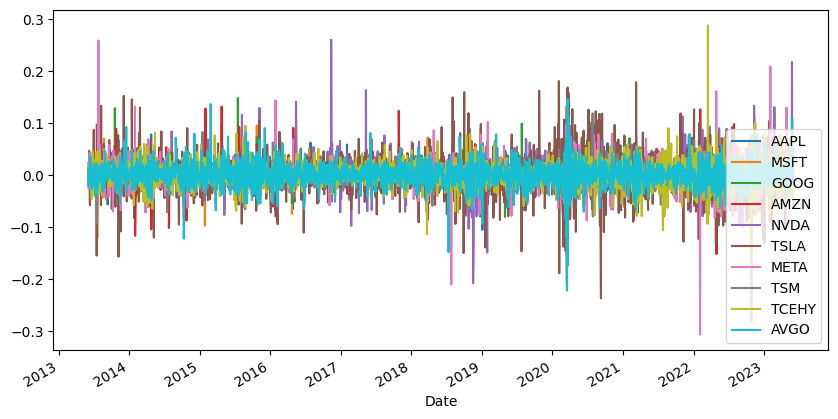

In [16]:
def calculate_returns(data):
  #Normalization of returns
  log_return = np.log(data/data.shift(1))
  return log_return[1:]

returns = calculate_returns(dataset)
show_data(returns)

Plotting daily returns shows the stocks volatility. <br>
In the above plot except for META and NVDA which have distinct spikes, others are relatively consistent.

In [17]:
# We find the mean annual returns and well as covariance of stock returns.
# covariance shows how each stocks returns is moving in relation to the other.

def show_statistics(returns):
  # instead of daily metrics, we need annual metrics
  # mean of annual return
  print(returns.mean() * NUM_TRADING_DAYS)
  print(returns.cov() * NUM_TRADING_DAYS)

show_statistics(returns)

AAPL     0.254429
MSFT     0.240830
GOOG     0.174481
AMZN     0.220475
NVDA     0.472728
TSLA     0.350321
META     0.241071
TSM      0.196567
TCEHY    0.169873
AVGO     0.335573
dtype: float64
           AAPL      MSFT      GOOG      AMZN      NVDA      TSLA      META  \
AAPL   0.081866  0.050713  0.046972  0.050357  0.071667  0.065327  0.055578   
MSFT   0.050713  0.075063  0.053202  0.054738  0.074820  0.060172  0.056214   
GOOG   0.046972  0.053202  0.076301  0.058429  0.068635  0.057850  0.065878   
AMZN   0.050357  0.054738  0.058429  0.108060  0.075449  0.072331  0.071546   
NVDA   0.071667  0.074820  0.068635  0.075449  0.206167  0.104996  0.081462   
TSLA   0.065327  0.060172  0.057850  0.072331  0.104996  0.318625  0.073595   
META   0.055578  0.056214  0.065878  0.071546  0.081462  0.073595  0.152512   
TSM    0.044405  0.041749  0.040478  0.040871  0.078413  0.060196  0.044070   
TCEHY  0.039100  0.038352  0.038704  0.043537  0.060495  0.061414  0.048296   
AVGO   0.057013

Best Mean average returns - NVDA, TSLA and AVGO <br>
Least Mean average returns - TCEHY, GOOG, TSM

In [20]:
def show_mean_variance(returns, weights):
  # Annual returns
  portfolio_returns = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS

  # portfolio volatility = SQRT(W^t (weights transposed) * (Covariance Matrix) * W (weights))
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

  print("Expected Portfolio Mean (returns): ", portfolio_returns)
  print("Expected Portfolio Volatility (STD): ", portfolio_volatility)

In [19]:
# Generate random weights for each stock totalling to 1 and generate 10,000 portfolios

def generate_portfolios(returns):
  portfolio_means = []
  portfolio_risks = []
  portfolio_weights = []

  for _ in range(NUM_PORTFOLIOS):
    # Create Random Weights
    w = np.random.random(len(stocks))
    # Rebalance Weights
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov()
                                                      * NUM_TRADING_DAYS, w))))

  return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

# Sharpe Ratio is Returns / Volatility. Higher the Sharpe Ratio better is the portfolio performance (ideally greater than 1)

def show_portfolios(returns, volatilities):
  #plt.figure(figsize=(10, 6))
  plt.scatter(volatilities, returns, c=returns / volatilities, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.show()



In [ ]:
weights, means, risks = generate_portfolios(returns)


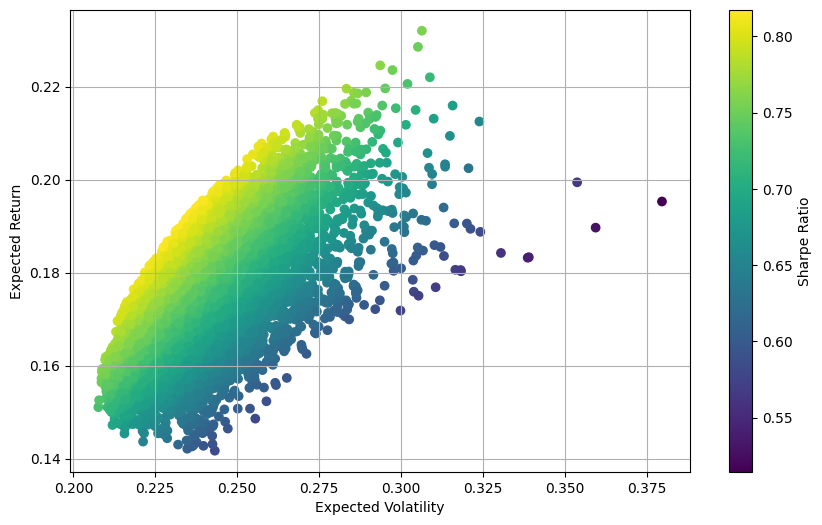

In [ ]:
show_portfolios(means, risks)

In [ ]:
def statistics(weights, returns):
  portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()
                                                          * NUM_TRADING_DAYS, weights)))
  return np.array([portfolio_return, portfolio_volatility,
                    portfolio_return / portfolio_volatility])

# scipy optimize module can find the minimum of a given function
# the maximum of a f(x) is the minimum of -f(x)
def min_function_sharpe(weights, returns):
  return -statistics(weights, returns)[2]

# what are the constraints? The sum of weights = 1 !!!
# f(x)=0 this is the function to minimize
def optimize_portfolio(weights, returns):
  # the sum of weights is 1
  constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
  # the weights can be 1 at most: 1 when 100% of money is invested into a single stock
  bounds = tuple((0, 1) for _ in range(len(stocks)))
  return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns
                                , method='SLSQP', bounds=bounds, constraints=constraints)


def print_optimal_portfolio(optimum, returns):
  print("Optimal portfolio: ", optimum['x'].round(3))
  print("Expected return, volatility and Sharpe ratio: ",
        statistics(optimum['x'].round(3), returns))

def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
  plt.figure(figsize=(10, 6))
  plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets / portfolio_vols, marker='o')
  plt.grid(True)
  plt.xlabel('Expected Volatility')
  plt.ylabel('Expected Return')
  plt.colorbar(label='Sharpe Ratio')
  plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize=20.0)
  plt.show()

Optimal portfolio:  [0.353 0.073 0.086 0.035 0.453]
Expected return, volatility and Sharpe ratio:  [0.19080449 0.23323053 0.81809399]


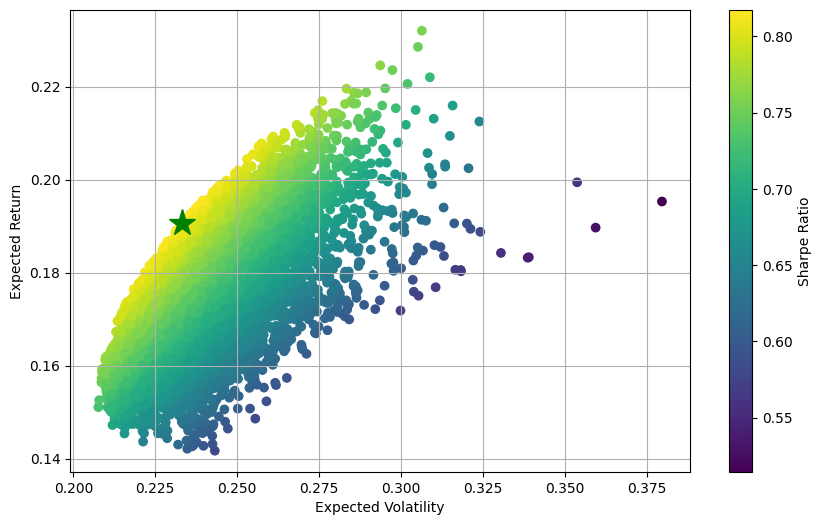

In [ ]:
optimum = optimize_portfolio(weights, returns)
print_optimal_portfolio(optimum, returns)
show_optimal_portfolio(optimum, returns, means, risks)

* Star represents the optimum portfolio for the selection of stocks taken
* Best sharpe ratio we can achieve with this portfolio selection is 0.82 (approx)